---

# **Implementação de Regressão Linear com o Scikit-learn**

O pacote **Scikit-learn** é amplamente usado para aprendizado de máquina, fundamentado sobre o **Numpy**, **SciPy** e alguns outros pacotes. Ele fornece os meios para pré-processamento de dados, redução da dimensionalidade, implementação de regressão, classificação, armazenamento em cluster, entre outros. Para saber mais sobre os modelos que podem ser implementados usando **Scikit-learn** visite o [site](https://scikit-learn.org/stable/).

---

## **Regressão Linear**

Primeiro precisamos nos perguntar, para que usamos uma regressão linear?

Uma regressão linear tem como objetivo tratar valores de forma a achar uma relação entre eles. Neste caso o termo "*Linear*" remete ao fato de que a relação entre estes valores é uma função *linear* de alguns parâmetros. 

Agora traremos um pouco da aboradagem teórica. Para se estimar o valor esperado usamos a equação:

$$\tilde{y}_i = b_0 + b_{i+1}x_i + \epsilon_{i} \quad \text{com $i =  1,2,... n$.}$$



Em notação matricial temos:

$$\mathbf{\tilde{y}} = \mathbf{b}\mathbf{x} + \mathbf{\epsilon} $$

Temos que $\mathbf{\tilde{y}}$ é uma matriz de $n \times 1$ observações, $\mathbf{x}$ é uma matriz de tamanho $n \times m+1$ (a primeira coluna sempre é preenchida por 1s, representando a constante $b_0$, e $m$ é a quantidade de entradas (ou regressor)), $\mathbf{b}$ é uma matriz $m+1 \times 1$ e $\mathbf{\epsilon}$ é uma matriz $n \times 1$ de resíduos (erros de medição).

$$\mathbf{x}= \begin{bmatrix}
 1 & x_{11} & x_{12} & x_{13} & \cdots & x_{1m}\\
 1 & x_{21} & x_{22} & x_{23} & \cdots & x_{2m}\\
 1 & x_{31} & x_{32} & x_{33} & \cdots & x_{3m}\\
 \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
 1 & x_{n1} & x_{n2} & x_{n3} & \cdots & x_{nm}\\
\end{bmatrix}$$



$$\mathbf{\tilde{y}}= \begin{bmatrix}
 \tilde{y}_{1} \\
 \tilde{y}_{2}\\
 \tilde{y}_{3}\\
 \vdots\\
 \tilde{y}_{n}\\
\end{bmatrix} 
\quad \mathbf{b}= \begin{bmatrix}
 b_{0} \\
 b_{1}\\
 b_{2}\\
 b_{3}\\
 \vdots\\
 b_{n}\\
 \end{bmatrix}
\quad \mathbf{\epsilon}= \begin{bmatrix}
 \epsilon_{1}\\
 \epsilon_{2}\\
 \epsilon_{3}\\
 \vdots\\
 \epsilon_{n}\\
\end{bmatrix}
$$



A resposta estimada ou prevista , $\tilde{y}_i$, para cada observação deve ser o mais próximo possível da resposta real correspondente $y_i$. Desta forma a diferença $y_i - \tilde{y}_i $ para todas as observações deve ser a menor possível, ou seja, de forma que $ y_i - \tilde{y}_i = \epsilon_i$, e os valores $\epsilon_i$ devem ser muito pequenos.

Para obter os melhores pesos (ou seja os melhores valores de $b_i$), você geralmente minimiza a soma dos resíduos quadrados (SSR) para todas as observações.

$$\mathbf{SSR} = \sum_{i} (y_i - \tilde{y}_i)^2$$

Desta forma o valor acima deve ser o mínimo possível e essa abordagem é denominada **método dos mínimos quadados ordinários**.

Uma boa maneira de verificar se seu modelo de regressão está bem ajustado é observar o valor de $R^2$ chamado de **coeficiente de determinação**, ele informa que percentual é eliminado do erro de previsão na variável $y$ quando usamos a regressão de mínimos quadrados sobre a variável $x$ (isto não será discutido aqui, para saber mais clique [aqui](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o)). 

Basicamente o $R^2$ informa qual quantidade de variação em $y$ pode ser explicada pela dependência de $\mathbf{x}$ usando o modelo de regressão. Um ajuste perfeito corresponderia a $R^{2}=1$ e $\mathbf{SSR} = 0$.

---

### **Regressão Simples**

Este é o caso mais simples de regressão linear, com uma única variável independente, $\mathbf{x}=x$. A função estimadam possui a forma $\tilde{y}_i = b_{0} + b_{1}x$, e aqui seu objetivo é calcular os valores $b_0$ e $b_1$ que tornem o **SSR** o menor possível.

Existem cinco etapas básicas ao implementar a regressão linear:

* Importe os pacotes e classes que você precisa.
* Forneça dados para trabalhar e faça as transformações apropriadas.
* Crie um modelo de regressão e ajuste-o aos dados existentes.
* Verifique os resultados do ajuste do modelo para saber se o modelo é satisfatório.
* Aplique o modelo para previsões.

Um modo menos formal de descrever essas etapas (até mais simplificado) é:

* Encontre o coeficiente angular.
* Determine a interceptação em y.
* Escreva a equação na forma $y = b_{0} + b_{1}x$.

Essas etapas são mais ou menos gerais para a maioria das abordagens e implementações de regressão. Agora vamos para a prática!!

### **Importar os pacotes**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

A classe ``sklearn.linear_model.LinearRegression`` é usada para realizar regressão linear e polinomial e fazer previsões de acordo com os dados usados.

### **Forneça os Dados**

Para a estapa forneça os dados com os quais quer trabalhar. As entradas (regressor, $X$) e saída (predictor, $y$) devem ser ``arrays`` ou um objeto semelhante.
 
A forma mais simples de se oferecer os dados é:

In [51]:
X = np.array([3, 13, 23, 33, 43, 53]).reshape((-1, 1))
y = np.array([3, 18, 12, 30, 20, 35])

Agora você tem os valores que precisa da entrada $X$ e a saída $y$. Usamos ``.reshape()`` sobre $x$ porque é necessário que a matriz seja bidimensional, ou para ser mais preciso, para ter uma coluna e tantas linhas quanto necessário. Vocẽ pode ver na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) que o método exige uma matriz do tipo ``X(n_samples, n_features)`` o que explica nosso o uso do método ``.reshape()``, pois temos apenas 1 feature e 6 linhas com as amostras de modo que ``.reshape((-1,1))`` rearranja nosso array de 6 colunas de amostras em apenas uma coluna com as amostras.

In [52]:
X

array([[ 3],
       [13],
       [23],
       [33],
       [43],
       [53]])

In [53]:
y

array([ 3, 18, 12, 30, 20, 35])

In [54]:
print('Dimensão de X:',X.shape)
print('Dimensão de y:',y.shape)

Dimensão de X: (6, 1)
Dimensão de y: (6,)


### **Crie o modelo e faça ajustes**

Para isto vamos criar uma instância da classe ``LinearRegression``, que representará o modelo de regressão:

In [55]:
skt_rg = LinearRegression()

Esta instrução cria a variável ``skt_rg`` como a instância de ``LinearRegression``. Você pode fornecer vários parâmetros opcionais:

* ``fit_intercept`` é um booleano (<font color='green'>True</font> por padrão) que decide se deve calcular a interceptação $b$ (<font color='green'>True</font>) ou considerá-la igual a zero (<font color='red'>False</font>).

* ``normalize`` é um booleano (<font color='red'>False</font> por padrão) que decide se deve normalizar as variáveis de entrada (<font color='green'>True</font>) ou não (<font color='red'>False</font>).

* ``copy_X`` é um booleano (<font color='green'>True</font> por padrão) que decide se deve copiar (<font color='green'>True</font>) ou sobrescrever as variáveis de entrada (<font color='red'>False</font>).

* ``n_jobs`` é um número inteiro ou **None** (padrão) e representa o número de trabalhos usados na computação paralela. **None** geralmente significa um trabalho e -1 significa usar todos os trabalhos.

Agora podemois usar o modelo:

In [56]:
skt_rg.fit(X, y)

LinearRegression()

Com ``.fit()``, você calcula os valores ótimos dos pesos $b_0$ e $b_1$, usando a entrada e a saída existentes ($X$ e $y$) como argumentos. Note que a declaração acima retorna a prória variável de forma que poderiamos ter feito:

In [57]:
rkt_rg = LinearRegression().fit(X, y) # simplifica todo o processo anterior

---

### **Resultados**

Depois que o modelo é ajustado podemos ver os resultados. Você pode obter o valor de $R^2$ chamando ``.score()`` na variável ``skt_rg``.

In [58]:
R = skt_rg.score(X,y)

print('coeficiente de determinação :', R)

coeficiente de determinação : 0.709868604976237


Perceba que os argumentos são X e y e o retorno é o valor de $R^2$.

Para determinar os coeficientes usamos os atributos ``.intercept_``, que retorna o coeficiente $b_0$, e ``.coef_``, que representa $b_1$.

In [59]:
print('interceptação:', skt_rg.intercept_)
print('coeficiente angular da reta:', skt_rg.coef_)

interceptação: 4.946666666666669
coeficiente angular da reta: [0.52571429]


In [60]:
type(skt_rg.intercept_)

numpy.float64

In [61]:
type(skt_rg.coef_)

numpy.ndarray

Perceba que ``skt_rg.intercept_`` é um numpy número (escalar) e ``skt_rg.coef_`` é uma matriz. E desta forma temos $b_0 = 4,94$ e $b_1 = 0,52$ e teriamos assim uma equação do tipo $\mathbf{y} = 4,94 + 0,52\mathbf{X} $.





---

### **Visualizando o que foi feito**

A figura abaixo ilustra a regressão linear simples que fizemos.

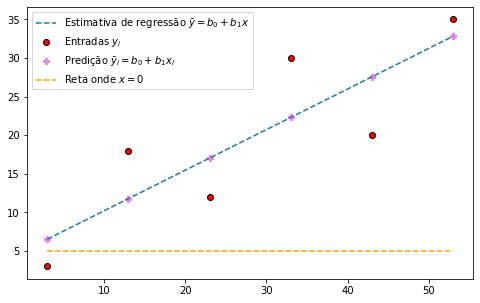

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X.ravel(),y, c='red', edgecolors='black')
ax.plot(X, skt_rg.intercept_+skt_rg.coef_*X,'--')
ax.scatter(X, skt_rg.intercept_+skt_rg.coef_*X, marker='P', color='violet')
ax.hlines(skt_rg.intercept_, X.min(), X.max(),color='orange', linestyles='dashed')
ax.legend(['Estimativa de regressão $ỹ = b_{0} + b_{1}x$','Entradas $y_i$',
           'Predição $ỹ_i = b_{0} + b_{1}x_i$ ', 'Reta onde $x = 0$']);

Veja que começamos com determinados pares de entrada x-y (os círuclos vermelhos) que são suas observações, seus dados "reais", a função estimada possui a forma $\tilde{y}= b_{0} + b_{1}x $ (linha tracejada azul), as repostas previstas (os sinais de $+$ violetas) são os pontos que estão na linha de regressão repesentando os valores "ótimos" e a reta onde $x=0$ (linha tracejada laranja) representa o valor de $b_0$, ou seja, onde a nossa reta de regressão corta o eixo $y$.

Os erros aleatórios são a distância entre os sinais de $+$ violetas e os círculos vermelhos, o seu objetivo ao fazer uma regressão linear é minimizá-la

---

### **Prevendo Resposta**

Se você obteve um modelo satisfatório pode usá-lo para previsões com novos dados ou já existentes. Para isso use o método ``.predict()``.

In [63]:
y_pred = skt_rg.predict(X)
print('resposta do método predict:', y_pred, sep='\n')

resposta do método predict:
[ 6.52380952 11.78095238 17.03809524 22.2952381  27.55238095 32.80952381]


Como você pode observar ao aplicar ``.predict()``, passa-se o regressor (variável X) como o argumento e obtém a resposta prevista correspondente.

Uma outra forma de se obter as predições é:

In [64]:
y_pred = skt_rg.intercept_ + skt_rg.coef_*X
print('resposta do método predict:', y_pred, sep='\n')

resposta do método predict:
[[ 6.52380952]
 [11.78095238]
 [17.03809524]
 [22.2952381 ]
 [27.55238095]
 [32.80952381]]


Perceba que agora temos uma matriz reposta bi-dimensional.

Como disse anteriormante você pode usar novos dados para gerar novas saídas com base nesses dados:

In [65]:
X_new = np.arange(5).reshape((-1, 1)) # novamente usando reshape para deixar a matriz em duas dimensões.
X_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [66]:
y_new = skt_rg.predict(X_new)
y_new

array([4.94666667, 5.47238095, 5.99809524, 6.52380952, 7.04952381])

Caso queira saber mais informações sobre esse método veja a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

---